# Assignmnet 4

### IFT6758 Fall 2019

### Due date: December 15, 2019

### Submit your answers and code as a pdf file in gradescope.

## Marc-Antoine Provost

### Deep Learning (Convolutional Neural Networks) [60 points + 10 bonus points]

This set of assignments will give you experience with deep learning. You will learn how to use convolution neural networks on a image corpus. 

For this problem use [documentation for Keras](https://keras.io/) deep learning library and for [Sklearn](https://scikit-learn.org/stable/index.html). Provide your code and the output.

#### Data preparation (20 points)

1. (1 point) Search MNIST dataset at [OpenML](https://www.openml.org/), it is called "mnist_784". Download it using sklearn function `fetch_openml`. Get features and targets.

In [0]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Your solution here
mnist_data = fetch_openml('mnist_784')
X, y = mnist_data['data'], mnist_data['target']

In [0]:
# reshape
x_reshaped = np.reshape(X, (X.shape[0],28,28))

def show_images(images, labels=None, columns=5, show_num=5):
  for i in range(show_num):
    plt.subplot(show_num / columns + 1, columns, i + 1)

    if labels is not None:
      plt.title(labels[i])

    plt.grid(None)
    plt.axis('off')
    plt.imshow(images[i], cmap='gray')

  plt.show()

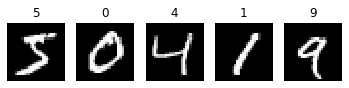

In [0]:
show_images(x_reshaped, y)

> This dataset represents each (28x28) image as a flat arrray of 784 features.

2. (3 point) Reshape it back to 28x28 and visualize a couple of images with matplotlib.

> Finally, we want to add one dummy dimension for the non-existent color information. Every resulting image should have dimensions 28x28x1. 
>
> We want this extra dimensions because image libraries are targeted towards RGB images that have 3 channels. Therefore RGB images are conviniently represented by the shape of WxHx3. We don't have 3 colors for MNIST dataset, so we just provide 1 channel.

3. (3 point) Add a channel dimension.


In [0]:
# Your solution here
x_reshaped = x_reshaped[:,:,:, np.newaxis]
x_reshaped.shape

(70000, 28, 28, 1)

> To simplify the task we exclude some classes.

4. (3 point) Filter data leaving only classes `1`, `3`, `7`. Transform features and targets. How many data points left after filtering?

In [0]:
# Your solution here
# find indices where the label is not 1, 3, or 7
wanted_classes = ['1','3','7']
indices = [i for i in range(len(y)) if y[i] not in wanted_classes]

x_filtered = np.delete(x_reshaped, indices, axis=0)
y_filtered = np.delete(y, indices, axis=0).astype(int)
print(f"There are now {len(x_reshaped) - len(indices)} data points left after filtering.")


There are now 22311 data points left after filtering.


5. (5 point) Convert targets to one-hot representation. Complete the following template.


```python
def to_categorical(array, classes):
    """
    array -- array of targets
    classes -- list of classes
    """
    ...

mnist_targets = to_categorical(mnist_targets, classes=...)
```

In [0]:
# Your solution here
def to_categorial(target, classes):
  one_hot = [[] for i in range(len(target))]
  for idx, value in enumerate(target):
    one_hot[idx] = np.zeros(len(classes), dtype=int).tolist()
    for i, number in enumerate(classes):
      if value == number:
        one_hot[idx][i] += 1
  return one_hot

In [0]:
mnist_targets = to_categorial(y_filtered, np.unique(y_filtered))

6. (5 point) Split the dataset into train, validataion, and test. Take first 16,000 images and targets as the train, then next 3,000 as validation, then the rest as the test subset.

In [0]:
# Your solution here
x_train = x_filtered[:16000]
y_train = mnist_targets[:16000]
x_valid = x_filtered[16000:19000]
y_valid = mnist_targets[16000:19000]
x_test = x_filtered[19000:]
y_test = mnist_targets[19000:]

In [0]:
y_train = np.reshape(y_train, (16000,3))
y_valid = np.reshape(y_valid, (3000,3))
y_test = np.reshape(y_test, (3311,3))


#### Training (35 points)


Use Keras (https://keras.io/) to create a neural network model. Use a sequential layer to combine following layers in this order:
- Convolution with 6 feature maps 5x5
- Rectified linear unit activation
- Max-pooling by factor of 2 each spacial dimension
- Convolution with 16 feature maps 5x5
- Rectified linear unit activation
- Max-pooling by factor of 2 each spacial dimension
- Flatten layer
- Dense layer with 128 output units
- Rectified linear unit activation
- Dense layer. Same size as the target.
- Softmax activation

1. (10 points) Complete the following template.

```python
... # place your imports here

model = Sequential([
    ..., # convolution
    ..., # activation
    ..., # pooling
    ..., # convolution
    ..., # activation
    ..., # pooling
    Flatten(),
    ..., # fully connected
    ..., # activation
    ..., # fully connected output
    ..., # softmax
])
model.summary()
```

In [0]:
# Your solution here
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

input_shape = (28,28,1)

model = Sequential()
model.add(Conv2D(6, kernel_size = 5, activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size= 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Using TensorFlow backend.






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 3)            

2. (5 point) Create a stochastic gradient optimizer optimizer with learning rate of $10^{-4}$. Compile the model with the categorical crossentropy loss. Set the model to report accuracy metric. Complete the template.


```python
... # place your imports here

optimizer = ... # create stochastic gradient optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'],
              )
```

In [0]:
# Your solution here
from keras import optimizers

optimizer = optimizers.SGD(lr=1e-4)
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'],
              )


3. (15 points) Train the model on the training set for at least 5 epochs. Perform validation after every epoch.

> **HINT** Find a method that performs training in the Keras documentation. Study the documentation paying attention to all arguments and the return value of the method.

> The model should have at least 95% accuracy on the training set. It might happen that the training gets stuck. In this case, go to the step before prevoious, recreate and rerun the model. 

> **WARNING** This step might take several minutes to compute on a laptop.

In [0]:
# Your solution here
model.fit(x_train, y_train, batch_size = 32, verbose=1, epochs=5, validation_data=(x_valid, y_valid))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 16000 samples, validate on 3000 samples
Epoch 1/5





16000/16000 [==============================] - 9s 535us/step - loss: 1.9452 - acc: 0.8393 - val_loss: 0.2541 - val_acc: 0.9637
Epoch 2/5
16000/16000 [==============================] - 8s 517us/step - loss: 0.2300 - acc: 0.9660 - val_loss: 0.1764 - val_acc: 0.9760
Epoch 3/5
16000/16000 [==============================] - 8s 529us/step - loss: 0.1758 - acc: 0.9730 - val_loss: 0.1329 - val_acc: 0.9797
Epoch 4/5
16000/16000 [==============================] - 8s 524us/step - loss: 0.1441 - acc: 0.9773 - val_loss: 0.1190 - val_acc: 0.9790
Epoch 5/5
16000/16000 [==============================] - 8s 514us/step - loss: 0.1240 - acc: 0.9789 - val_loss: 0.1032 - val_acc: 0.9817


4. (5 point) Plot the training loss against the validation loss. Do you observe overfitting/underfitting?

> **HINT** Explore the return value in the previous step.

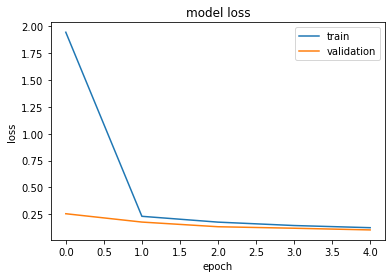

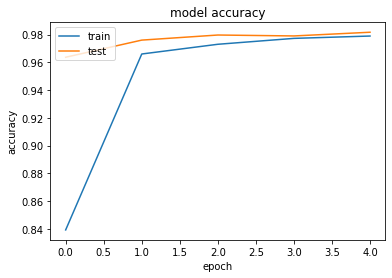

In [34]:
# Your solution here
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("model loss")
plt.legend(['train', 'validation'], loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

I do not observe overfitting since the validation loss doesn't increase, but continues to decrease as the number of epochs grow. 

#### Evaluation (5 points)

1. (1 point) Make prediciton of the model on the test set 


In [0]:
# Your solution here
test_predictions = model.predict(x_test)

2. (4 points) Compute the confusion matrix and the accuracy. Which classes confused most often?

> The model should have at least 90% accuracy.

In [0]:
y_pred = list(np.argmax(test_predictions, axis=1))

In [0]:
# Your solution here
from sklearn.metrics import confusion_matrix

y_true = y_filtered[19000:]
y_confusion = np.zeros(len(y_true))

for idx, val in enumerate(y_pred):
  if val == 0:
    y_confusion[idx] += 1
  elif val == 1:
    y_confusion[idx] += 3
  elif val == 2:
    y_confusion[idx] += 7

In [0]:
confusion = confusion_matrix(y_true, y_confusion)
pd.crosstab(y_true, y_confusion, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1.0,3.0,7.0,All
True,,,,
1,1173,8,1,1182
3,13,1019,21,1053
7,20,13,1043,1076
All,1206,1040,1065,3311


The classes that are confused most often are the class 3 and 7, with 34 uncorrect predictions for class 3 and 33 uncorrect preditions for class 7.

#### Bonus point (10 points)

Can you suggest/implement a new model/paramter to omprove the performance?

In [35]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

input_shape = (28,28,1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=32,
          epochs=5,
          verbose=1,
          validation_data=(x_valid, y_valid))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 16000 samples, validate on 3000 samples
Epoch 1/5
16000/16000 [==============================] - 56s 3ms/step - loss: 0.8786 - acc: 0.9386 - val_loss: 0.1748 - val_acc: 0.9880
Epoch 2/5
16000/16000 [==============================] - 55s 3ms/step - loss: 0.2432 - acc: 0.9813 - val_loss: 0.1035 - val_acc: 0.9910
Epoch 3/5
16000/16000 [==============================] - 54s 3ms/step - loss: 0.1258 - acc: 0.9886 - val_loss: 0.0775 - val_acc: 0.9927
Epoch 4/5
16000/16000 [==============================] - 54s 3ms/step - loss: 0.0949 - acc: 0.9911 - val_loss: 0.0409 - val_acc: 0.9950
Epoch 5/5
16000/16000 [==============================] - 55s 3ms/step - loss: 0.0761 - acc: 0.9909 - val_loss: 0.0324 - val_acc: 0.9960


With dropout and another optimizer, I was able to achieve 99.6% accuracy on the validation set, which is an improvement from the previous CNN implemented (1% improvement)

### Graph ML [40 points]

This set of assingments will teach you the differences between various node embeddings in graphs. Note that all questions are programming assingments but you do not need to use loss function to optimize the claculation of thesee embeddings.

1- (5 points) Write a function randadjmat(n,p) in Python which returns an adjacency matrix for a "random graph" on n vertices. Here p is the probability of having an edge between any pair of vertices.




In [0]:
def randadjmat(n,p):
    #your solution here
    adjacency = np.random.random((n,n))
    adjacency = np.where(adjacency < p, 1,0)
    np.fill_diagonal(adjacency, 0)
    return adjacency

2- (5 points) Write a function transionmat(A) which, given an adjacency matrix A, generate a transition matrix T where probability of each edge (u,v) is calculated as $1/degree(u)$.


In [0]:
def transionmat(A):
    #your solution here
    T = A.astype(float)
    for i in range(A.shape[0]):
      degree = np.sum(T[i])
      T[i] = np.dot(T[i], 1/degree)
    return T 

3- (5 points) Write a function hotembd(A) which, given an adjacency matrix A, generate an embedding matrix H where each node is represetned with a 1-hot vector.

In [0]:
def hotembd(A):
    #your solution here
    n = len(A)
    H = np.zeros((n,n))
    for i in range(n):
      H[i][i] += 1
    return H

4- (5 points) Write a function randwalkemb(A,k) which, given an adjacency matrix A, a transition matrix T, and one-hot encoding H, performs [random walks](https://en.wikipedia.org/wiki/Random_walk) on the graph from each node w times with lenght equal to l and generate an embedding matrix for each node based on the sum of 1-hot encodings of all nodes that are visited during the walks.


In [0]:
def randwalkembd(A,T, H, w, l):
  n = len(A)
  embedding_matrix = np.zeros((n,n)) 
  for node in range(n):
    node_embedding = np.zeros((n,)) 
    for walk in range(w):
      nodes_visited = np.zeros((n,)) 
      nodes_visited += H[node] 
      for step in range(l):
        current_node = np.random.choice(n, size=1, p=T[node])[0]
        nodes_visited += H[current_node]
      node_embedding += nodes_visited
    embedding_matrix[node] = node_embedding
  return embedding_matrix

5- (5 points) Write a function hopeneighbormbd(A,H, k) which, given an adjacency matrix A, and one-hot node encoding matrix H, generates node embedding matrix which represents each node as sum of 1-hot encodings of k-hobs neighbors. 


In [0]:
def hopeneighbormbd(A, H, k):
    #your solution here
    from numpy.linalg import matrix_power
    n = len(A)
    K_hop_matrix = np.zeros((n,n))
    K_hop_matrix = matrix_power(A, k)
    return K_hop_matrix

6- (5 points) Write a function similarnodes(Z) which, given an node embedding matrix, find the most similar nodes in the graph. 

In [0]:
def similarnodes(Z):
    #your solution here
    import heapq
    n = len(Z)
    computed = [0 for i in range(n)]
    results = [0 for i in range(n)]
    for node in range(n):
      for node2 in range(n):
        if node2 == node:
          continue
        cosine_similarity = dot(Z[node], Z[node2])/ (norm(Z[node])*norm(Z[node2]))
        computed[node2] = (cosine_similarity)
      results[node] = max(computed)
    most_similar = np.argpartition(results, -2)[-2:]
    return print(f"The most similar nodes are node {most_similar[0]} and node {most_similar[1]}")

7- (10 points) generate a random graph where n=20, and p=0.6, and compare the most similar nodes in the graph using randwalkembd (l=4, w=10), hopeneighbormbd (k=1) and hopeneighbormbd (k=2). Justify why similar nodes are different using different node embeddings?

In [251]:
np.random.seed(0)
A = randadjmat(20, 0.6)
T = transionmat(A)
H = hotembd(A)
embedding_randm = randwalkembd(A, T, H, 10, 4)
embedding_hop_1 = hopeneighbormbd(A, H, 1)
embedding_hop_2 = hopeneighbormbd(A, H, 2)

similarnodes(embedding_randm)
similarnodes(embedding_hop_1)
similarnodes(embedding_hop_2)

The most similar nodes are node 13 and node 1
The most similar nodes are node 8 and node 6
The most similar nodes are node 16 and node 1


Each node embedding representation has a common purpose; that similar nodes in a graph have similar embeddings. How they differ is how they represent the measure of similarity between nodes. In one-hop and two-hop embeddings, nodes are similar if they share common one-hop or two-hop neighbors. While with random walk, the embeddings include local and distant neighborhood information. Thus, having a different way of measuring similarity, similar nodes with different embedding representation will be different. 
